In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
%config InlineBackend.figure_format = 'svg'
# plt.rcParams['font.size'] = 15

In [2]:
def get_vacuum(fname):
    try:
        f = open(fname,"r")
    except:
        raise FileNotFoundError(fname)
    line = f.readline()
    while line != '':
        if 'vacuum' in line:
            vacuum = float(line.split()[-2])
            return vacuum
        else:
            line = f.readline()
def get_eqp_homo_lumo_gap(fname):
    try:
        f = open(fname,"r")
    except:
        raise FileNotFoundError(fname)  
    f.readline();
    f.readline();
    line = f.readline()
    homo = float(line.split()[5])
    line = f.readline()
    lumo = float(line.split()[5])
    return homo,lumo,lumo-homo
def model_func(x,a,b):
    return a+b/x

## Figure 1: characteristics of eigenpotentials

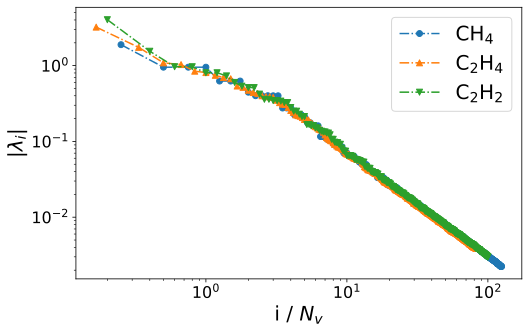

In [3]:
def get_wstat_eigenvalues(fname):
    eigens = []
    try:
        f = open(fname,'r')
    except:
        raise FileNotFoundError(fname)
    f.readline()
    line = f.readline()
    while line != '':
        eigens.append(float(line.split()[1]))
        line = f.readline()
    return eigens

prefix = "./G2_97/"
markers = ['o','^','v','P','*','x']
moles = [ 'CH4', 'C2H4', 'C2H2']
Nv = [4, 6,5]
labels = [r'$\mathrm{CH_4}$',r'$\mathrm{C_2H_4}$',r'$\mathrm{C_2H_2}$']
eigenvals = []
for m in moles:
    fname = prefix+'%s-PBE/wstat/o-wstat.converged.tab'%m
    eigenvals.append(get_wstat_eigenvalues(fname))

eigenvals = np.array(eigenvals)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in range(len(moles)):
    plt.loglog(np.arange(1,1+len(eigenvals[i]))/Nv[i],abs(eigenvals[i]),label=labels[i],ls='-.',marker=markers[i])
plt.legend(fontsize=20)
plt.xlabel(r'i / $N_v$',fontsize=20)
plt.ylabel(r'$|\lambda_i|$',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_yscale('log')
plt.show()
# fig.savefig("fig/eigenvals.eps",bbox_inches='tight',dpi=200)
# fig.savefig("fig/eigenvals.png",bbox_inches='tight',dpi=200)

### Response to reviewer's question

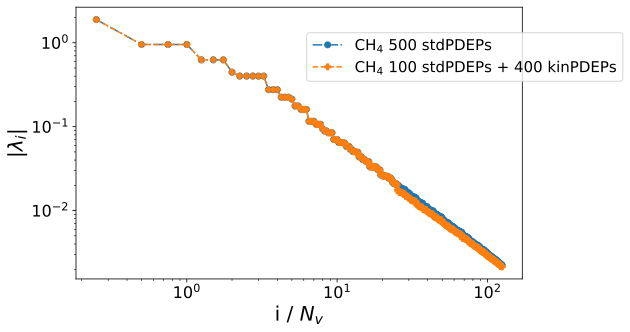

In [5]:
mix_eigens = []
moles = ['CH4']
Nv = [4,6,5]
labels = [r'$\mathrm{CH_4}$']
for m in moles:
    fname = './G2_97/%s_100_400.txt'%m
#     print(fname)
    df = pd.read_csv(fname,names=['eig'])
    mix_eigens.append(df['eig'].values)
    
mix_eigens = np.array(mix_eigens)

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in range(1):
    plt.loglog(np.arange(1,1+len(eigenvals[i]))/Nv[i],-eigenvals[i],label=labels[i]+" 500 stdPDEPs",ls='-.',marker=markers[i])
    
for i in range(1):
    plt.loglog(np.arange(1,1+len(mix_eigens[i]))/Nv[i],-mix_eigens[i],label=labels[i]+" 100 stdPDEPs + 400 kinPDEPs",ls='--',marker=markers[i+3])

# ax.axvline(x=100/Nv[0],c='r')
plt.legend(fontsize=15,bbox_to_anchor=(0.5, 0.7))
plt.xlabel(r'i / $N_v$',fontsize=20)
plt.ylabel(r'$|\lambda_i|$',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_yscale('log')
plt.show()
# fig.savefig("fig/Compare_PDEP_eigenvals_and_mix_eigenvals.eps",bbox_inches="tight")
# fig.savefig("fig/Compare_PDEP_eigenvals_and_mix_eigenvals.png",bbox_inches="tight",dpi=200)

## Figure 2. Example of extrapolation

-14.0135977776 8.69952298304


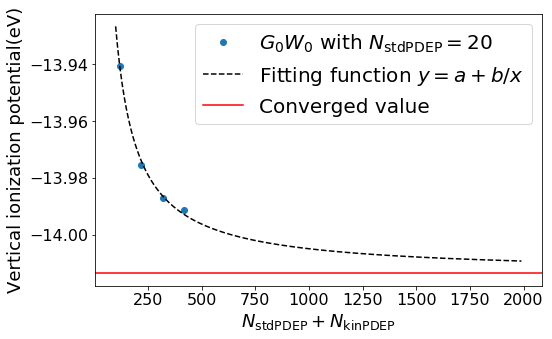

0.03933891


In [25]:
for m in ['CH4']:
    x = []
    y = []
    vacuum = get_vacuum("./G2_97/%s-PBE/pw/%s.out"%(m,m.lower()))
    prefix = "./G2_97/%s-PBE/wfreq"%m
    for i in range(100,401,100):
        fname = prefix+"/kin-20/kin-20-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        x.append(20+i)
        y.append(homo-vacuum)
    p,q = curve_fit(model_func,x,y)
    print(p[0],p[1])
    xx = np.arange(100,2000,10)
    
    x = np.array(x)
    y = np.array(y)
    
    fig = plt.figure(figsize=(8,5))
    ax = plt.subplot(111)
    plt.plot(x,y,'o',c='C0',label=r'$G_0W_0$ with $N_\mathrm{stdPDEP}=20$')
    plt.plot(xx,model_func(xx,*p),'--k',label=r'Fitting function $y = a+b/x$')
    ax.axhline(y=p[0],c='r',label='Converged value')
    plt.legend(fontsize=20)
    plt.xlabel(r'$N_\mathrm{stdPDEP}+N_\mathrm{kinPDEP}$',fontsize=18)
    plt.ylabel('Vertical ionization potential(eV)',fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    print(vacuum)
    fig.savefig('fig/Fitting_example_of_CH4_from120.eps',bbox_inches='tight') 
    fig.savefig('fig/Fitting_example_of_CH4_from120.png',bbox_inches='tight',dpi=200)
    

### Reponse to reviewer's comments

-11.0472075706 4.81175115902


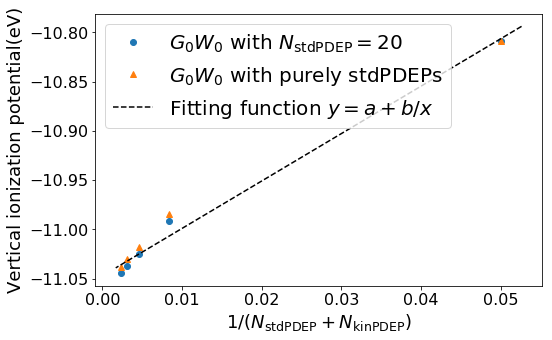

0.0533427
-13.9995501461 5.56412408762


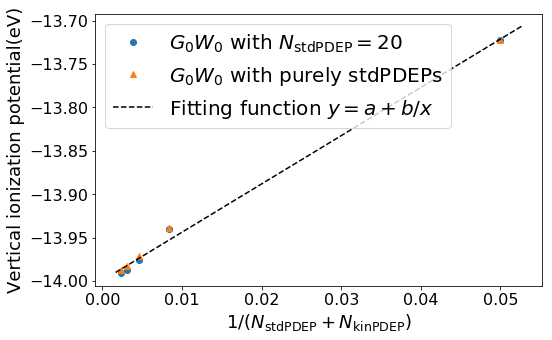

0.03933891


In [26]:
for m in ['C2H2','CH4']:
    x = []
    y = []
    z = []
    vacuum = get_vacuum("./G2_97/%s-PBE/pw/%s.out"%(m,m.lower()))
    prefix = "./G2_97/%s-PBE/wfreq"%m
    for i in range(0,401,100):
        fname = prefix+"/kin-20/kin-20-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        x.append(20+i)
        y.append(homo-vacuum)
    for i in range(0,401,100):
        fname = prefix+"/std-%d/o-eqp.converged.tab"%(i+20)
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
#         x.append(20+i)
        z.append(homo-vacuum)
    p,q = curve_fit(model_func,x,y)
    print(p[0],p[1])
    xx = np.arange(19,600,10)
    
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    
    fig = plt.figure(figsize=(8,5))
    ax = plt.subplot(111)
    plt.plot(1/x,y,'o',c='C0',label=r'$G_0W_0$ with $N_\mathrm{stdPDEP}=20$')
    plt.plot(1/x,z,'^',c='C1',label=r'$G_0W_0$ with purely stdPDEPs')
    plt.plot(1/xx,model_func(xx,*p),'--k',label=r'Fitting function $y = a+b/x$')
#     ax.axhline(y=p[0],c='r',label='Converged value')
    plt.legend(fontsize=20)
    plt.xlabel(r'$1/(N_\mathrm{stdPDEP}+N_\mathrm{kinPDEP})$',fontsize=18)
    plt.ylabel('Vertical ionization potential(eV)',fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    print(vacuum)

    fig.savefig('fig/Fitting_example_of_%s_1_to_N.eps'%m,bbox_inches="tight",dpi=200)   
    fig.savefig('fig/Fitting_example_of_%s_1_to_N.png'%m,bbox_inches="tight",dpi=200)

-13.9995501461 5.56412408762


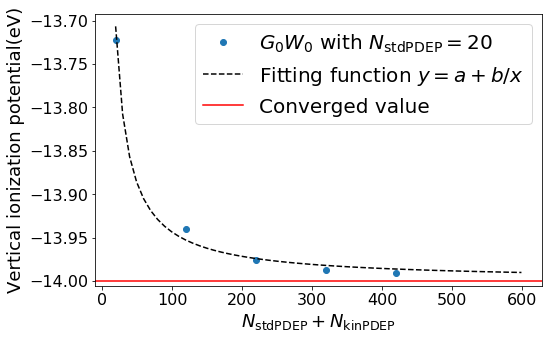

0.03933891


In [27]:
for m in ['CH4']:
    x = []
    y = []
    z = []
    vacuum = get_vacuum("./G2_97/%s-PBE/pw/%s.out"%(m,m.lower()))
    prefix = "./G2_97/%s-PBE/wfreq"%m
    for i in range(0,401,100):
        fname = prefix+"/kin-20/kin-20-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        x.append(20+i)
        y.append(homo-vacuum)
    for i in range(0,401,100):
        fname = prefix+"/std-%d/o-eqp.converged.tab"%(i+20)
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
#         x.append(20+i)
        z.append(homo-vacuum)
    p,q = curve_fit(model_func,x,y)
    print(p[0],p[1])
    xx = np.arange(19,600,10)
    
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    
    fig = plt.figure(figsize=(8,5))
    ax = plt.subplot(111)
    plt.plot(x,y,'o',c='C0',label=r'$G_0W_0$ with $N_\mathrm{stdPDEP}=20$')
#     plt.plot(x,z,'^',c='C1',label=r'$G_0W_0$ with purely stdPDEPs')
    plt.plot(xx,model_func(xx,*p),'--k',label=r'Fitting function $y = a+b/x$')
    ax.axhline(y=p[0],c='r',label='Converged value')
    plt.legend(fontsize=20)
    plt.xlabel(r'$N_\mathrm{stdPDEP}+N_\mathrm{kinPDEP}$',fontsize=18)
    plt.ylabel('Vertical ionization potential(eV)',fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    print(vacuum)

    fig.savefig('fig/Fitting_example_of_%s_from20.eps'%m,bbox_inches="tight")    
    fig.savefig('fig/Fitting_example_of_%s_from20.png'%m,bbox_inches="tight",dpi=200)

-13.9742588734 8.69952424081
-13.9867168752 8.41518038097
-14.2119273819 7.90799193365


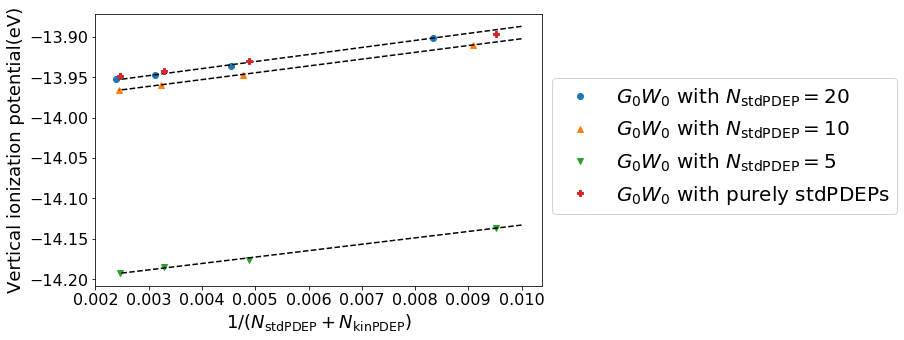

In [28]:
pdep_tot = []
kin = []
std = []
nstds = [20,10,5]
for m in ['CH4']:
    prefix = "./G2_97/%s-PBE/wfreq"%m
    for istd in range(len(nstds)):
        pdep_tot.append([])
        kin.append([])
        std.append([])
        for i in range(100,401,100):
            pdep_tot[-1].append(nstds[istd]+i)
            fname = prefix+"/kin-%d/kin-%d-%d/o-eqp.converged.tab"%(nstds[istd],nstds[istd],i)
            homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
            kin[-1].append([homo,lumo])
            
            fname = prefix+"/std-%d/o-eqp.converged.tab"%(nstds[istd]+i)
            homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
            std[-1].append([homo,lumo])

pdep_tot = np.array(pdep_tot)
kin = np.array(kin)
std = np.array(std)

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
markers = ['o','^','v','P','*','x']
for istd in range(3):
    p,q = curve_fit(model_func,pdep_tot[istd],kin[istd][:,0])
    print(p[0],p[1])
    xx = np.arange(100,420,10)
    yy = model_func(xx,*p)
    
    plt.plot(1/pdep_tot[istd],kin[istd][:,0],markers[istd],label=r'$G_0W_0$ with $N_\mathrm{stdPDEP}=%d$'%(nstds[istd]))
    plt.plot(1/xx,yy,'--k')

plt.plot(1/pdep_tot[istd],std[istd][:,0],markers[istd+1],label=r'$G_0W_0$ with purely stdPDEPs')


plt.legend(fontsize=20,bbox_to_anchor=(1.0, 0.8))
plt.xlabel(r'$1/(N_\mathrm{stdPDEP}+N_\mathrm{kinPDEP})$',fontsize=18)
plt.ylabel('Vertical ionization potential(eV)',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

fig.savefig('fig/Fitting_from_different_stdPDEP.eps',bbox_inches="tight",dpi=200)
fig.savefig('fig/Fitting_from_different_stdPDEP.png',bbox_inches="tight",dpi=200)

In [29]:
p20,q = curve_fit(model_func,pdep_tot[0],kin[0][:,0])
p10,q = curve_fit(model_func,pdep_tot[1],kin[1][:,0])
p05,q = curve_fit(model_func,pdep_tot[2],kin[2][:,0])
pstd,q = curve_fit(model_func,pdep_tot[2],std[2][:,0])
print(p20[0],p10[0],p05[0],pstd[0])

for v in [p20[0],p10[0],p05[0]]:
    print("Absolute error          = %6.2f eV"%(abs(v-pstd[0])))
    print("Relative absolute error = %6.2f%%"%(abs((v-pstd[0])/pstd[0])*100))

-13.9742588734 -13.9867168752 -14.2119273819 -13.9665775694
Absolute error          =   0.01 eV
Relative absolute error =   0.05%
Absolute error          =   0.02 eV
Relative absolute error =   0.14%
Absolute error          =   0.25 eV
Relative absolute error =   1.76%


## Table 1. summarize G2_97 results

In [30]:
moles = ['C2H2', 'C2H4', 'C4H4S', 'C6H6', 'CH3Cl', 
        'CH3OH', 'CH3SH', 'CH4', 'Cl2', 'ClF', 'CO', 
        'CO2', 'CS', 'F2', 'H2CO', 'H2O', 'H2O2', 
        'HCl', 'HCN','Na2'] 
refVIP = {'C2H2':11.10, 'C2H4':10.35, 'C4H4S':8.90, 'C6H6':9.10,
          'CH3Cl':11.27, 'CH3OH':10.47, 'CH3SH':9.31, 'CH4':13.99,
          'Cl2':11.48, 'ClF':12.47, 'CO':13.45, 'CO2':13.31,
          'CS':10.92, 'F2':14.90, 'H2CO':10.38, 'H2O':11.81,
          'H2O2':10.96, 'HCl':12.54, 'HCN':13.30, 'Na2':4.73}
refVEA = {'C2H2':-2.495, 'C2H4':-1.798, 'C4H4S':np.nan, 'C6H6':-0.930,
          'CH3Cl':np.nan, 'CH3OH':-0.909, 'CH3SH':np.nan, 'CH4':-0.761,
          'Cl2':1.381, 'ClF':np.nan, 'CO':-0.438, 'CO2':-0.974,
          'CS':0.495, 'F2':1.059, 'H2CO':-0.764, 'H2O':-0.911,
          'H2O2':-1.796, 'HCl':-1.092, 'HCN':-2.250, 'Na2':0.613}

In [31]:
eqp = []
for m in moles:
    vacuum = get_vacuum("./G2_97/%s-PBE/pw/%s.out"%(m,m.lower()))
    prefix = "./G2_97/%s-PBE/wfreq"%m
    for i in range(100,401,100):
        fname = prefix+"/kin-20/kin-20-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        eqp.append((m,20,i,homo-vacuum,lumo-vacuum,gap))
    for i in range(100,401,100):
        fname = prefix+"/kin-100/kin-100-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        eqp.append((m,100,i,homo-vacuum,lumo-vacuum,gap))
    for i in range(200,501,100):
        fname = prefix+"/std-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        eqp.append((m,i,0,homo-vacuum,lumo-vacuum,gap))

#     for i in range(120,500,100):
#         fname = prefix+"/std-%d/o-eqp.converged.tab"%i
#         homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
#         eqp.append((m,i,0,homo-vacuum,lumo-vacuum,gap))


# print(eqp)
eqp = np.array(eqp,dtype=[('mol','<U32'),('std',np.int),('kin',np.int),('homo',np.float),('lumo',np.float),('gap',np.float)])
eqp_df = pd.DataFrame(eqp,columns=['mol','std','kin','homo','lumo','gap'])
eqp_df

,mol,std,kin,homo,lumo,gap
0,C2H2,20,100,-10.991768,2.511903,13.503671
1,C2H2,20,200,-11.025014,2.468454,13.493468
2,C2H2,20,300,-11.036888,2.451996,13.488884
3,C2H2,20,400,-11.044840,2.444306,13.489146
4,C2H2,100,100,-11.013901,2.467937,13.481838
5,C2H2,100,200,-11.030275,2.450507,13.480782
6,C2H2,100,300,-11.037150,2.441241,13.478391
7,C2H2,100,400,-11.042327,2.435506,13.477833
8,C2H2,200,0,-11.015763,2.466930,13.482693
9,C2H2,300,0,-11.030270,2.450033,13.480303


In [32]:
eqp_interp = []
for i in range(0,len(eqp),4):
    mol = eqp['mol'][i]
    tmpstd = eqp['std'][i:i+4]
    tmpkin = eqp['kin'][i:i+4]
    tmphomo = eqp['homo'][i:i+4]
    tmplumo = eqp['lumo'][i:i+4]
    popt,popv = curve_fit(model_func,tmpstd+tmpkin,tmphomo)
    homo = popt[0]
    popt,popv = curve_fit(model_func,tmpstd+tmpkin,tmplumo)
    lumo = popt[0]
    eqp_interp.append((mol,homo,lumo,lumo-homo))

In [33]:
eqp_interp

[('C2H2', -11.065177816174936, 2.416720493817706, 13.481898309992642),
 ('C2H2', -11.061075536660482, 2.4142139944818104, 13.475289531142293),
 ('C2H2', -11.057834026892095, 2.4147994046724652, 13.47263343156456),
 ('C2H4', -10.409512276791254, 1.7504414809559086, 12.159953757747163),
 ('C2H4', -10.401466028482051, 1.7489552052466006, 12.150421233728652),
 ('C2H4', -10.399130817479636, 1.7473905282345417, 12.146521345714177),
 ('C4H4S', -8.8041237460085497, 0.8495707307859609, 9.6536944767945112),
 ('C4H4S', -8.7653174373186289, 0.80582785063774764, 9.5711452879563765),
 ('C4H4S', -8.7615856544342563, 0.80152273282375075, 9.5631083872580067),
 ('C6H6', -9.1741315801690089, 1.0059402787819813, 10.18007185895099),
 ('C6H6', -9.1374814285296324, 0.96370319075709276, 10.101184619286725),
 ('C6H6', -9.1323278552426181, 0.96007672322177573, 10.092404578464393),
 ('CH3Cl', -11.278907414790012, 1.165065217913017, 12.44397263270303),
 ('CH3Cl', -11.255109137506206, 1.163255171440033, 12.4183643

In [34]:
for i in range(0,len(eqp_interp),3):
    # print order : kin20, kin100, std100, without ref
    print("%6s & %6.2f & %6.2f & %6.2f \\\\"%(moles[i//3],-eqp_interp[i][1],-eqp_interp[i+1][1],-eqp_interp[i+2][1]))

  C2H2 &  11.07 &  11.06 &  11.06 \\
  C2H4 &  10.41 &  10.40 &  10.40 \\
 C4H4S &   8.80 &   8.77 &   8.76 \\
  C6H6 &   9.17 &   9.14 &   9.13 \\
 CH3Cl &  11.28 &  11.26 &  11.25 \\
 CH3OH &  10.58 &  10.56 &  10.56 \\
 CH3SH &   9.39 &   9.36 &   9.36 \\
   CH4 &  14.01 &  14.01 &  14.01 \\
   Cl2 &  11.51 &  11.51 &  11.50 \\
   ClF &  12.55 &  12.55 &  12.54 \\
    CO &  13.51 &  13.50 &  13.50 \\
   CO2 &  13.32 &  13.31 &  13.31 \\
    CS &  11.00 &  10.98 &  10.98 \\
    F2 &  14.99 &  14.97 &  14.97 \\
  H2CO &  10.43 &  10.42 &  10.42 \\
   H2O &  11.82 &  11.82 &  11.81 \\
  H2O2 &  10.87 &  10.87 &  10.86 \\
   HCl &  12.50 &  12.50 &  12.50 \\
   HCN &  13.20 &  13.20 &  13.20 \\
   Na2 &   4.95 &   4.95 &   4.95 \\


In [35]:
# for i in range(0,len(eqp_interp),3):
#     print("%6s & %6.2f & %6.2f & %6.2f & %6.2f & %6.2f \\\\"%(moles[i//4],-eqp_interp[i][2],-eqp_interp[i+1][2],-eqp_interp[i+2][2],-eqp_interp[i+3][2],refVEA[moles[i//4]]))
# #     print(eqp_interp[i][1])

for i in range(0,len(eqp_interp),3):
    # print order : kin20, kin100, std100, without ref
    print("%6s & %6.2f & %6.2f & %6.2f \\\\"%(moles[i//3],-eqp_interp[i][2],-eqp_interp[i+1][2],-eqp_interp[i+2][2]))

  C2H2 &  -2.42 &  -2.41 &  -2.41 \\
  C2H4 &  -1.75 &  -1.75 &  -1.75 \\
 C4H4S &  -0.85 &  -0.81 &  -0.80 \\
  C6H6 &  -1.01 &  -0.96 &  -0.96 \\
 CH3Cl &  -1.17 &  -1.16 &  -1.16 \\
 CH3OH &  -0.89 &  -0.89 &  -0.89 \\
 CH3SH &  -0.88 &  -0.88 &  -0.88 \\
   CH4 &  -0.64 &  -0.64 &  -0.64 \\
   Cl2 &   1.65 &   1.64 &   1.65 \\
   ClF &   1.28 &   1.28 &   1.28 \\
    CO &  -1.56 &  -1.57 &  -1.57 \\
   CO2 &  -0.97 &  -0.97 &  -0.97 \\
    CS &   0.49 &   0.51 &   0.51 \\
    F2 &   1.16 &   1.16 &   1.16 \\
  H2CO &  -0.69 &  -0.68 &  -0.68 \\
   H2O &  -0.90 &  -0.90 &  -0.90 \\
  H2O2 &  -1.80 &  -1.79 &  -1.79 \\
   HCl &  -1.07 &  -1.07 &  -1.07 \\
   HCN &  -2.08 &  -2.08 &  -2.08 \\
   Na2 &   0.64 &   0.63 &   0.63 \\


## Time usage

In [36]:
moles = ['C2H2', 'C2H4', 'C4H4S', 'C6H6', 'CH3Cl', 
        'CH3OH', 'CH3SH', 'CH4', 'Cl2', 'ClF', 'CO', 
        'CO2', 'CS', 'F2', 'H2CO', 'H2O', 'H2O2', 
        'HCl', 'HCN','Na2']

def string2sec(s):
    hour = 0
    minute = 0
    second = 0
    beg = 0
    end = 0
    for i in range(len(s)):
        if s[i] == 'h':
            end = i
            hour = float(s[beg:end])
            beg = i+1
        elif s[i] == 'm':
            end = i
            minute = float(s[beg:end])
            beg = i+1
        elif s[i] == 's':
            end = i
            second = float(s[beg:end])
    return 3600*hour+60*minute+second

def get_wall_time(fname):
    time = 0.0
    with open(fname,'r') as f:
        lines = f.readlines()
        time = string2sec(lines[-8][34:46])
    return time

# 20 stdEPs
### wstat calculation time
kin20 = []
for mol in moles:
    fname = './G2_97/%s-PBE/wstat/%s_20_400.out'%(mol,mol.lower())
    kin20.append(get_wall_time(fname))

### wfreq calculation time
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = './G2_97/%s-PBE/wfreq/kin-20/kin-20-%d/kin-20-%d.out'%(moles[im],i,i)
        kin20[im] += get_wall_time(fname)
         
# 100 stdEPs
kin100 = []
for mol in moles:
    fname = './G2_97/%s-PBE/wstat/%s_100_400.out'%(mol,mol.lower())
    kin100.append(get_wall_time(fname))
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = './G2_97/%s-PBE/wfreq/kin-100/kin-100-%d/kin-100-%d.out'%(moles[im],i,i)
        kin100[im] += get_wall_time(fname)
        
# std-120, 220, 320, 420
std20 = []
for mol in moles:
    fname = './G2_97/%s-PBE/wstat/%s_420.out'%(mol,mol.lower())
    std20.append(get_wall_time(fname))
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = './G2_97/%s-PBE/wfreq/std-%d/std-%d.out'%(moles[im],20+i,20+i)
        std20[im] += get_wall_time(fname)
        
# std-200,300,400,500
std100 = []
for mol in moles:
    fname = './G2_97/%s-PBE/wstat/%s_500.out'%(mol,mol.lower())
    std100.append(get_wall_time(fname))
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = './G2_97/%s-PBE/wfreq/std-%d/std-%d.out'%(moles[im],100+i,100+i)
        std100[im] += get_wall_time(fname)

In [37]:
print(kin20)
print(kin100)
print(std20)
print(std100)

[3305.7400000000002, 3587.6799999999994, 7621.8099999999995, 6695.289999999999, 3997.46, 3963.25, 3991.14, 3082.27, 4003.92, 3977.25, 3291.1099999999997, 4323.29, 3329.26, 4128.889999999999, 3654.7200000000003, 2968.26, 3994.96, 2972.64, 3339.76, 4506.87]
[4725.96, 4422.06, 13969.18, 9511.43, 5577.49, 5605.889999999999, 5635.639999999999, 4642.84, 5700.110000000001, 5575.66, 4666.25, 6058.820000000001, 4691.99, 5579.85, 5118.32, 4212.48, 5622.34, 4221.6900000000005, 4685.45, 6164.379999999999]
[4178.93, 3362.46, 14240.650000000001, 8296.779999999999, 4892.7, 5283.0, 4937.13, 3661.15, 5188.389999999999, 5354.709999999999, 3783.17, 5178.950000000001, 4113.76, 4608.650000000001, 4431.18, 3618.97, 4906.36, 3622.41, 4063.58, 4920.07]
[5374.96, 4455.94, 17653.0, 10577.529999999999, 6234.0599999999995, 6238.039999999999, 6342.17, 4751.52, 6544.79, 6258.0, 4877.36, 6660.23, 5227.389999999999, 6174.639999999999, 5634.36, 4623.25, 5963.09, 4613.57, 5157.1, 6390.039999999999]


In [38]:
print(1-sum(kin20)/sum(std20))
print(1-sum(kin20)/sum(std100))
print(1-sum(kin100)/sum(std100))
# print(sum(kin100)/sum(std20))

0.21343325896554088
0.37776552696610377
0.10299115906893674


In [39]:
# moles = ['C2H2', 'C2H4', 'C4H4S', 'C6H6', 'CH3Cl', 
#         'CH3OH', 'CH3SH', 'CH4', 'Cl2', 'ClF', 'CO', 
#         'CO2', 'CS', 'F2', 'H2CO', 'H2O', 'H2O2', 
#         'HCl', 'HCN','Na2']

moles = ['CH4']

# 5 stdEPs
### wstat calculation time
kin5 = []
for mol in moles:
    fname = './G2_97/%s-PBE/wstat/%s_5_400.out'%(mol,mol.lower())
    kin5.append(get_wall_time(fname))

### wfreq calculation time
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = './G2_97/%s-PBE/wfreq/kin-5/kin-5-%d/kin-5-%d.out'%(moles[im],i,i)
        kin5[im] += get_wall_time(fname)

# 10 stdEPs
### wstat calculation time
kin10 = []
for mol in moles:
    fname = './G2_97/%s-PBE/wstat/%s_10_400.out'%(mol,mol.lower())
    kin10.append(get_wall_time(fname))

### wfreq calculation time
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = './G2_97/%s-PBE/wfreq/kin-10/kin-10-%d/kin-10-%d.out'%(moles[im],i,i)
        kin10[im] += get_wall_time(fname)

# 20 stdEPs
### wstat calculation time
kin20 = []
for mol in moles:
    fname = './G2_97/%s-PBE/wstat/%s_20_400.out'%(mol,mol.lower())
    kin20.append(get_wall_time(fname))

### wfreq calculation time
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = './G2_97/%s-PBE/wfreq/kin-20/kin-20-%d/kin-20-%d.out'%(moles[im],i,i)
        kin20[im] += get_wall_time(fname)
         
# 100 stdEPs
kin100 = []
for mol in moles:
    fname = './G2_97/%s-PBE/wstat/%s_100_400.out'%(mol,mol.lower())
    kin100.append(get_wall_time(fname))
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = './G2_97/%s-PBE/wfreq/kin-100/kin-100-%d/kin-100-%d.out'%(moles[im],i,i)
        kin100[im] += get_wall_time(fname)
        
# std-120, 220, 320, 420
std20 = []
for mol in moles:
    fname = './G2_97/%s-PBE/wstat/%s_420.out'%(mol,mol.lower())
    std20.append(get_wall_time(fname))
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = './G2_97/%s-PBE/wfreq/std-%d/std-%d.out'%(moles[im],20+i,20+i)
        std20[im] += get_wall_time(fname)
        
# std-200,300,400,500
std100 = []
for mol in moles:
    fname = './G2_97/%s-PBE/wstat/%s_500.out'%(mol,mol.lower())
    std100.append(get_wall_time(fname))
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = './G2_97/%s-PBE/wfreq/std-%d/std-%d.out'%(moles[im],100+i,100+i)
        std100[im] += get_wall_time(fname)

In [40]:
print(1-sum(kin5)/sum(std100))
print(1-sum(kin10)/sum(std100))
print(1-sum(kin20)/sum(std100))
print(1-sum(kin100)/sum(std100))
# print(sum(kin100)/sum(std20))

0.4067645721790081
0.3924996632656498
0.351308633868741
0.022872680742162532
